# Zero to Pandas Course Project: 2017 Halloween Candy Survey

##Introduction
For six weeks, from August to September, I was enrolled in a [Python Data Analysis course](https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas) through a collaboration between Jovian.ML and Freecode Camp. 
>"Data Analysis with Python: Zero to Pandas” is a practical, beginner-friendly and coding-focused introduction to data analysis covering the basics of Python, Numpy, Pandas, data visualization and exploratory data analysis.
I learned data analysis and visualization with just Python and then the libraries of NumPy, Pandas, Matplotlib, and Seaborn.

During the course, we were tasked with completing three assignments and an overall course project. This Jupyter notebook is my final course project. Since I consider the entire month of October as Halloween season, I thought it would be appropriate to analyze some Halloween related data. 

##Dataset
In recent years, a group at The University of British Columbia surveyed people on their Halloween activities, so I chose to analyze the data from their 2017 survey: [Candy Hierarchy 2017 Survey](https://www.scq.ubc.ca/so-much-candy-data-seriously/). The survey, with over 2000 responses, has information on age, gender, location, and candy preferences.


## Data Preparation and Cleaning

As a first step, I uploaded my Jupyter notebook to [Jovian.ml](https://jovian.ml/), created variables for my project name and the location of my data, and then installed Pandas so that I could work with my data as a dataset.

In [ ]:
project_name = "course-project-halloween-candy"

In [ ]:
project_file = "https://raw.githubusercontent.com/rdhm113/z-to-p-course-project/main/candyhierarchy2017.csv"

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

In [9]:
import pandas as pd

In [10]:
project_file

'https://raw.githubusercontent.com/rdhm113/z-to-p-course-project/main/candyhierarchy2017.csv'

After importing my dataset, I encountered a read error when previewing the dataframe. I imported it again and set an encoding type to eliminate the error.

In [11]:
candy_survey_raw_df = pd.read_csv(project_file, encoding = 'ISO-8859-1')

Previewing and requesting info on the dataframe showed me that there are 115 columns and 2460 rows of data in my dataset.

In [12]:
candy_survey_raw_df

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we donÕt know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,...,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | ReeseÕs Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,...,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,...,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,"Reese's crispy crunchy bars, 5th avenue bars, ...",NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,...,DESPAIR,JOY,JOY,MEH,JOY,NaN,JOY,JOY,DESPAIR,NaN,MEH,DESPAIR,JOY,

In [13]:
candy_survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 120 entries, Internal ID to Click Coordinates (x, y)
dtypes: float64(4), int64(1), object(115)
memory usage: 2.3+ MB


Previewing a list of column headers showed the basic data for the columns. In the absence of a data schema, I used the [PDF of the survey](https://www.scq.ubc.ca/wp-content/uploads/2017/10/candyhierarchysurvey2017.pdf) to understand the relationship between column headers and possible row values. 

In [14]:
candy_survey_raw_df.columns

Index(['Internal ID', 'Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       ...
       'Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS', 'Q10: DRESS', 'Unnamed: 113',
       'Q11: DAY', 'Q12: MEDIA [Daily Dish]', 'Q12: MEDIA [Science]',
       'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]', 'Click Coordinates (x, y)'],
      dtype='object', length=120)

An important step that I've learned in this course and other data analysis that I've done is to **always** make a copy of data to work with. This preserves the raw data in case you need to go back and start again or fix errors.

In [15]:
candy_survey_df = candy_survey_raw_df.copy()
candy_survey_df

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we donÕt know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,...,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | ReeseÕs Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,...,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,...,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,"Reese's crispy crunchy bars, 5th avenue bars, ...",NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,...,DESPAIR,JOY,JOY,MEH,JOY,NaN,JOY,JOY,DESPAIR,NaN,MEH,DESPAIR,JOY,

Next, columns that wouldn't be used for analysis were dropped: Internal ID and survey questions 7-13.

In [16]:
candy_survey_df.drop(['Internal ID', 'Q7: JOY OTHER','Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS', 'Q10: DRESS', 'Unnamed: 113',
       'Q11: DAY', 'Q12: MEDIA [Daily Dish]', 'Q12: MEDIA [Science]',
       'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]', 'Click Coordinates (x, y)'], axis=1, inplace=True)

candy_survey_df.columns

Index(['Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       'Q6 | Bonkers (the candy)',
       ...
       'Q6 | Three Musketeers', 'Q6 | Tolberone something or other',
       'Q6 | Trail Mix', 'Q6 | Twix',
       'Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein',
       'Q6 | Vicodin', 'Q6 | Whatchamacallit Bars', 'Q6 | White Bread',
       'Q6 | Whole Wheat anything', 'Q6 | York Peppermint Patties'],
      dtype='object', length=108)

Reviewed dateframe info again after the change.

In [17]:
candy_survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 108 entries, Q1: GOING OUT? to Q6 | York Peppermint Patties
dtypes: object(108)
memory usage: 2.0+ MB


Calculated the null values to get an idea of how many questions were left unanswered.

In [18]:
candy_survey_df.isnull().sum()

Q1: GOING OUT?                      110
Q2: GENDER                           41
Q3: AGE                              84
Q4: COUNTRY                          64
Q5: STATE, PROVINCE, COUNTY, ETC    100
                                   ... 
Q6 | Vicodin                        789
Q6 | Whatchamacallit Bars           823
Q6 | White Bread                    757
Q6 | Whole Wheat anything           747
Q6 | York Peppermint Patties        705
Length: 108, dtype: int64

The column names needed some clean up for easier use so the following steps were taken. The codes were run multiple times as I kept finding inconsistencies.

Cleaning up column names to remove question numbers: Q1, Q2, etc.

In [19]:
candy_survey_df.columns = candy_survey_df.columns.str[4:] #strip the first 4 leading characters

candy_survey_df.columns

Index(['GOING OUT?', 'GENDER', 'AGE', 'COUNTRY',
       'STATE, PROVINCE, COUNTY, ETC', ' 100 Grand Bar',
       ' Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       ' Any full-sized candy bar', ' Black Jacks', ' Bonkers (the candy)',
       ...
       ' Three Musketeers', ' Tolberone something or other', ' Trail Mix',
       ' Twix',
       ' Vials of pure high fructose corn syrup, for main-lining into your vein',
       ' Vicodin', ' Whatchamacallit Bars', ' White Bread',
       ' Whole Wheat anything', ' York Peppermint Patties'],
      dtype='object', length=108)

Now that the question numbers were removed, I noticed that there were leading white spaces in some of the column names that needed to be removed. 

In [20]:
candy_survey_df.columns = candy_survey_df.columns.str.strip() #strip leading and trailing whitespace
candy_survey_df.columns

Index(['GOING OUT?', 'GENDER', 'AGE', 'COUNTRY',
       'STATE, PROVINCE, COUNTY, ETC', '100 Grand Bar',
       'Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Any full-sized candy bar', 'Black Jacks', 'Bonkers (the candy)',
       ...
       'Three Musketeers', 'Tolberone something or other', 'Trail Mix', 'Twix',
       'Vials of pure high fructose corn syrup, for main-lining into your vein',
       'Vicodin', 'Whatchamacallit Bars', 'White Bread',
       'Whole Wheat anything', 'York Peppermint Patties'],
      dtype='object', length=108)

Renamed specific columns to make them easier to understand. For example: "Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes)" was not a column name that I wanted to work with.

In [21]:
candy_survey_df.rename(columns={ 'GOING OUT?':'Going Out','Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)':'Mary Janes','Chick-o-Sticks (we don’t know what that is)':'Chick-o-Sticks','Sourpatch Kids (i.e. abominations of nature)':'Sourpatch Kids','Tolberone something or other':'Tolberone','Vials of pure high fructose corn syrup, for main-lining into your vein':'high fructose corn syrup'}, inplace=True)

candy_survey_df.columns

Index(['Going Out', 'GENDER', 'AGE', 'COUNTRY', 'STATE, PROVINCE, COUNTY, ETC',
       '100 Grand Bar', 'Mary Janes', 'Any full-sized candy bar',
       'Black Jacks', 'Bonkers (the candy)',
       ...
       'Three Musketeers', 'Tolberone', 'Trail Mix', 'Twix',
       'high fructose corn syrup', 'Vicodin', 'Whatchamacallit Bars',
       'White Bread', 'Whole Wheat anything', 'York Peppermint Patties'],
      dtype='object', length=108)

Converted all column names to title case.

In [22]:
candy_survey_df.columns = candy_survey_df.columns.str.title()

candy_survey_df.columns

Index(['Going Out', 'Gender', 'Age', 'Country', 'State, Province, County, Etc',
       '100 Grand Bar', 'Mary Janes', 'Any Full-Sized Candy Bar',
       'Black Jacks', 'Bonkers (The Candy)',
       ...
       'Three Musketeers', 'Tolberone', 'Trail Mix', 'Twix',
       'High Fructose Corn Syrup', 'Vicodin', 'Whatchamacallit Bars',
       'White Bread', 'Whole Wheat Anything', 'York Peppermint Patties'],
      dtype='object', length=108)

After additional work, I noticed that some columns had an unexpected character: 'õ'.


In [23]:
candy_survey_df.columns = candy_survey_df.columns.str.replace('õ', '\'')

candy_survey_df.columns

Index(['Going Out', 'Gender', 'Age', 'Country', 'State, Province, County, Etc',
       '100 Grand Bar', 'Mary Janes', 'Any Full-Sized Candy Bar',
       'Black Jacks', 'Bonkers (The Candy)',
       ...
       'Three Musketeers', 'Tolberone', 'Trail Mix', 'Twix',
       'High Fructose Corn Syrup', 'Vicodin', 'Whatchamacallit Bars',
       'White Bread', 'Whole Wheat Anything', 'York Peppermint Patties'],
      dtype='object', length=108)

After column name work it was time to move on to the Age and Country columns.

### Clean up the Age and Country columns
The Age and Country survey questions allowed for answers in free-form text fields so a lot of my time was focused on cleaning these.

#### Country

I started by viewing how many unique country values existed and the country names and counts. There were 128 which could have been true values or not. I needed to do some more digging.

In [24]:
candy_survey_df.Country.nunique()

128

In [25]:
candy_survey_df.Country.value_counts()

USA                             699
United States                   497
usa                             217
Canada                          179
Usa                             139
                               ... 
Korea                             1
U.S.                              1
Indonesia                         1
The United States of America      1
Ahem....Amerca                    1
Name: Country, Length: 128, dtype: int64

In sampling some of the dataset, I immediately noticed inconsistencies in how countries were named, the most visible was for the United States of America.

In [26]:
candy_survey_df.sample(20)

,Going Out,Gender,Age,Country,"State, Province, County, Etc",100 Grand Bar,Mary Janes,Any Full-Sized Candy Bar,Black Jacks,Bonkers (The Candy),Bonkers (The Board Game),Bottle Caps,Box'O'Raisins,Broken Glow Stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy That Is Clearly Just The Stuff Given Out For Free At Restaurants,Caramellos,"Cash, Or Other Forms Of Legal Tender",Chardonnay,Chick-O-Sticks (We Don't Know What That Is),Chiclets,Coffee Crisp,Creepy Religious Comics/Chick Tracts,Dental Paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow Sticks,Goo Goo Clusters,Good N' Plenty,Gum From Baseball Cards,Gummy Bears Straight Up,Hard Candy,Healthy Fruit,Heath Bar,Hershey'S Dark Chocolate,Hershey's Milk Chocolate,...,Minibags Of Chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'N'Laters,Peeps,Pencils,Pixy Stix,Real Housewives Of Orange County Season 9 Blue-Ray,Reese's Peanut Butter Cups,Reese'S Pieces,Reggie Jackson Bar,Rolos,Sandwich-Sized Bags Filled With Booberry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids,Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (A Friend To Diabetes),Take 5,Tic Tacs,Those Odd Marshmallow Circus Peanut Things,Three Musketeers,Tolberone,Trail Mix,Twix,High Fructose Corn Syrup,Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat Anything,York Peppermint Patties
1165,No,Male,31,United States,Virginia,JOY,DESPAIR,JOY,NaN,NaN,NaN,NaN,DESPAIR,DESPAIR,JOY,JOY,MEH,DESPAIR,JOY,JOY,MEH,NaN,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,...,MEH,MEH,MEH,MEH,MEH,MEH,JOY,NaN,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,MEH,DESPAIR,MEH,JOY,JOY,MEH,JOY,DESPAIR,MEH,MEH,JOY,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,MEH
1810,No,Male,39,United states,New jersey,MEH,DESPAIR,JOY,JOY,MEH,MEH,MEH,DESPAIR,NaN,JOY,DESPAIR,JOY,DESPAIR,MEH,JOY,NaN,JOY,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,MEH,...,DESPAIR,JOY,MEH,JOY,MEH,JOY,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,JOY,MEH,MEH,DESPAIR,MEH,JOY,MEH,JOY,JOY,NaN,JOY,MEH,JOY,MEH,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY
1099,No,Female,27,US,CA,JOY,MEH,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,JOY,MEH,JOY,DESPAIR,JOY,DESPAIR,JOY,JOY,MEH,MEH,JOY,MEH,...,JOY,DESPAIR,DESPAIR,JOY,MEH,JOY,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,JOY,DESPAIR,MEH,DESPAIR,JOY,JOY,JOY,JOY,JOY,DESPAIR,MEH,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,JOY,DESPAIR,JOY,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR
1913,No,Male,32,usa,california,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1726,No,Male,26,United States,CT,MEH,DESPAIR,JOY,NaN,NaN,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,JOY,NaN,JOY,NaN,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,NaN,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,MEH,...,JOY,DESPAIR,JOY,MEH,JOY,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,NaN,DESPAIR,DESPAIR,JOY,MEH,NaN,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY
1994,No,Male,37,usa,oklahoma,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,JOY,JOY,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,JOY,MEH,MEH,...,DESPAIR,JOY,JOY,JOY,JOY,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,JOY,DESPAIR,MEH,JOY,JOY,DESPAIR,JOY,MEH,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY
499,Yes,Female,42,us,michigan,Na

My first bit of cleanup was to remove any leading or trailing whitespace in the Country column.

In [27]:
candy_survey_df.Country = candy_survey_df.Country.str.strip()

candy_survey_df

,Going Out,Gender,Age,Country,"State, Province, County, Etc",100 Grand Bar,Mary Janes,Any Full-Sized Candy Bar,Black Jacks,Bonkers (The Candy),Bonkers (The Board Game),Bottle Caps,Box'O'Raisins,Broken Glow Stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy That Is Clearly Just The Stuff Given Out For Free At Restaurants,Caramellos,"Cash, Or Other Forms Of Legal Tender",Chardonnay,Chick-O-Sticks (We Don't Know What That Is),Chiclets,Coffee Crisp,Creepy Religious Comics/Chick Tracts,Dental Paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow Sticks,Goo Goo Clusters,Good N' Plenty,Gum From Baseball Cards,Gummy Bears Straight Up,Hard Candy,Healthy Fruit,Heath Bar,Hershey'S Dark Chocolate,Hershey's Milk Chocolate,...,Minibags Of Chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'N'Laters,Peeps,Pencils,Pixy Stix,Real Housewives Of Orange County Season 9 Blue-Ray,Reese's Peanut Butter Cups,Reese'S Pieces,Reggie Jackson Bar,Rolos,Sandwich-Sized Bags Filled With Booberry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids,Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (A Friend To Diabetes),Take 5,Tic Tacs,Those Odd Marshmallow Circus Peanut Things,Three Musketeers,Tolberone,Trail Mix,Twix,High Fructose Corn Syrup,Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat Anything,York Peppermint Patties
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,...,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
2,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,...,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR
4,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,...,DESPAIR,JOY,JOY,MEH,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,JOY,DESPAIR,JOY,JOY,MEH,JOY,NaN,JOY,JOY,DESPAIR,NaN,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,No,Male,24,USA,MD,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,JOY,MEH,JOY,JOY,DESPAIR,MEH,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,MEH,DESPAIR,JOY,

The Country text-field allowed for numerous spellings and namings of countries and the majority of my project cleaning was spent here. I repeatedly cycled through replace and value counts functions to find and merge as many inconsistencies as possible.

In [28]:
candy_survey_df.Country.value_counts(ascending=True) #Sorting country values from least amount to greatest.

Ahem....Amerca      1
Indonesia           1
Korea               1
New Jersey          1
spain               1
                 ... 
Usa               140
Canada            187
usa               217
United States     534
USA               772
Name: Country, Length: 117, dtype: int64

In [29]:
#Replacing country names to consolidate names.
candy_survey_df.Country = candy_survey_df.Country.replace(['united States','United Statea','united ststes','murrika','USA? Hard to tell anymore..','U S','usas','u s a','The United States of America','unite states','USA! USA! USA!','america','United Sates','Unied States','United State','America','Unites States','United Stated','USSA','USAUSAUSA','The United States','u.s.','Unites States,''america','US of A','united states of america','USA USA USA!!!!','United ststes','\'merica', 'U.S.A.','u.s.a.','U.S.','United staes','United Statss','Us','us', 'USa', 'USAA', 'Usa', 'USA','usa','US', 'united states','United States of America','United states'],'United States')
candy_survey_df.Country = candy_survey_df.Country.replace(['Canada`','CANADA','canada','Can'], 'Canada')
candy_survey_df.Country = candy_survey_df.Country.replace(['U.K.','endland','uk','Uk','UK','United kingdom','England'],'United Kingdom')
candy_survey_df.Country = candy_survey_df.Country.replace(['germany'],'Germany')
candy_survey_df.Country = candy_survey_df.Country.replace(['australia'],'Australia')
candy_survey_df.Country = candy_survey_df.Country.replace(['france'],'France')

In [30]:
#Creating a new series of only the top 15 countries
top_countries = candy_survey_df.Country.value_counts().head(15)

top_countries

United States     2037
Canada             226
United Kingdom      35
Germany             10
Australia            7
Netherlands          6
Scotland             5
Japan                5
Ireland              4
Mexico               4
Switzerland          3
France               3
China                2
Sweden               2
Denmark              2
Name: Country, dtype: int64

There were so many minuscule country counts that became difficult and timeconsuming to catch them all. I decided that my project would focus on the top 10-20 countries.

#### Age

 I expected that there could be white space in the Age data, as I learned with the Country data, so my first step was to strip that.

In [31]:
candy_survey_df.Age = candy_survey_df.Age.str.strip()
candy_survey_df.Age.value_counts()

40                92
34                90
37                89
43                86
36                79
                  ..
old enough         1
46 Halloweens.     1
77                 1
99                 1
5u                 1
Name: Age, Length: 106, dtype: int64

Reviewing the value counts showed that there were non-numerical values. All non-numerical values were converted to null.

In [32]:
candy_survey_df.Age = pd.to_numeric(candy_survey_df.Age, errors='coerce')

candy_survey_df.Age.value_counts()

40.0    92
34.0    90
37.0    89
43.0    86
36.0    79
        ..
77.0     1
88.0     1
4.0      1
99.0     1
1.0      1
Name: Age, Length: 82, dtype: int64

In [33]:
candy_survey_df.Age.describe()

count    2351.000000
mean       42.605444
std        23.844665
min         1.000000
25%        34.000000
50%        41.000000
75%        50.000000
max      1000.000000
Name: Age, dtype: float64

Upon reviewing a summary of the age values, I noticed a problem because there was a max value of 1000. I'd be very concerned if there were people who are 200+ years old answering the survey. I chose to drop the rows with values greater than 110.

In [34]:
candy_survey_df.drop(candy_survey_df[candy_survey_df.Age>110].index, inplace=True)

candy_survey_df.Age.describe()

count    2349.000000
mean       42.083184
std        12.144721
min         1.000000
25%        34.000000
50%        41.000000
75%        50.000000
max       102.000000
Name: Age, dtype: float64

I reviewed the dataframe again for any final touchups and noticed that the very first row contains null values.

In [35]:
candy_survey_df

,Going Out,Gender,Age,Country,"State, Province, County, Etc",100 Grand Bar,Mary Janes,Any Full-Sized Candy Bar,Black Jacks,Bonkers (The Candy),Bonkers (The Board Game),Bottle Caps,Box'O'Raisins,Broken Glow Stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy That Is Clearly Just The Stuff Given Out For Free At Restaurants,Caramellos,"Cash, Or Other Forms Of Legal Tender",Chardonnay,Chick-O-Sticks (We Don't Know What That Is),Chiclets,Coffee Crisp,Creepy Religious Comics/Chick Tracts,Dental Paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow Sticks,Goo Goo Clusters,Good N' Plenty,Gum From Baseball Cards,Gummy Bears Straight Up,Hard Candy,Healthy Fruit,Heath Bar,Hershey'S Dark Chocolate,Hershey's Milk Chocolate,...,Minibags Of Chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'N'Laters,Peeps,Pencils,Pixy Stix,Real Housewives Of Orange County Season 9 Blue-Ray,Reese's Peanut Butter Cups,Reese'S Pieces,Reggie Jackson Bar,Rolos,Sandwich-Sized Bags Filled With Booberry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids,Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (A Friend To Diabetes),Take 5,Tic Tacs,Those Odd Marshmallow Circus Peanut Things,Three Musketeers,Tolberone,Trail Mix,Twix,High Fructose Corn Syrup,Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat Anything,York Peppermint Patties
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Male,44.0,United States,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,...,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
2,NaN,Male,49.0,United States,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,Male,40.0,United States,or,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,...,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR
4,No,Male,23.0,United States,exton pa,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,...,DESPAIR,JOY,JOY,MEH,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,JOY,DESPAIR,JOY,JOY,MEH,JOY,NaN,JOY,JOY,DESPAIR,NaN,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,No,Male,24.0,United States,MD,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,JOY,MEH,JOY,JOY,DESPAIR,MEH,DESPAIR

In [36]:
candy_survey_df = candy_survey_df.drop(candy_survey_df.index[0]) #Dropping first row as it's filled with null values

candy_survey_df

,Going Out,Gender,Age,Country,"State, Province, County, Etc",100 Grand Bar,Mary Janes,Any Full-Sized Candy Bar,Black Jacks,Bonkers (The Candy),Bonkers (The Board Game),Bottle Caps,Box'O'Raisins,Broken Glow Stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy That Is Clearly Just The Stuff Given Out For Free At Restaurants,Caramellos,"Cash, Or Other Forms Of Legal Tender",Chardonnay,Chick-O-Sticks (We Don't Know What That Is),Chiclets,Coffee Crisp,Creepy Religious Comics/Chick Tracts,Dental Paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow Sticks,Goo Goo Clusters,Good N' Plenty,Gum From Baseball Cards,Gummy Bears Straight Up,Hard Candy,Healthy Fruit,Heath Bar,Hershey'S Dark Chocolate,Hershey's Milk Chocolate,...,Minibags Of Chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'N'Laters,Peeps,Pencils,Pixy Stix,Real Housewives Of Orange County Season 9 Blue-Ray,Reese's Peanut Butter Cups,Reese'S Pieces,Reggie Jackson Bar,Rolos,Sandwich-Sized Bags Filled With Booberry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids,Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (A Friend To Diabetes),Take 5,Tic Tacs,Those Odd Marshmallow Circus Peanut Things,Three Musketeers,Tolberone,Trail Mix,Twix,High Fructose Corn Syrup,Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat Anything,York Peppermint Patties
1,No,Male,44.0,United States,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,...,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
2,NaN,Male,49.0,United States,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,Male,40.0,United States,or,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,...,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR
4,No,Male,23.0,United States,exton pa,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,...,DESPAIR,JOY,JOY,MEH,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,JOY,DESPAIR,JOY,JOY,MEH,JOY,NaN,JOY,JOY,DESPAIR,NaN,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY
5,No,Male,NaN,NaN,NaN,JOY,DESPAIR,JOY,NaN,NaN,NaN,MEH,MEH,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,JOY,JOY,MEH,MEH,JOY,DESPAIR,MEH,MEH,JOY,NaN,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,MEH,JOY,JOY,MEH,...,JOY,JOY,JOY,JOY,MEH,JOY,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,MEH,MEH,NaN,NaN,MEH,DESPAIR,JOY,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,No,Male,24.0,United States,MD,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR

After all of that work, I felt that my dataset was clean enough to go forward with visualization.

In [37]:
import jovian

In [38]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/rdhm113/course-project-halloween-candy


'https://jovian.ml/rdhm113/course-project-halloween-candy'

## Exploratory Analysis and Visualization

My plan going forward was to use Matplotlib and Seaborn for visualization.

I started by importing matplotlib and seaborn and then setting my chart styles.

In [39]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# chart styling
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = 'white'

# Setting a Halloween themed colored palette
colors = ['#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e', '#000000', '#8a29b2', '#ff9936', '#ff6100', '#a9640e']
sns.set_palette(colors)

### Going out or staying in?

The first question on the survey asked if the respondents had plans to go out to celebrate Halloween or to just stay home. 


Let's start by seeing how many responses are left after clean-up.

In [40]:
candy_survey_df['Going Out']

1        No
2       NaN
3        No
4        No
5        No
       ... 
2455     No
2456     No
2457     No
2458     No
2459     No
Name: Going Out, Length: 2457, dtype: object

Next, let's look at how the 2,457 responses were spread.

In [41]:
candy_survey_df['Going Out'].value_counts() #View results of values

No     2037
Yes     311
Name: Going Out, dtype: int64

I used the seaborn .countplot() function to count the number of values since "Yes" and "No" aren't numerical values.

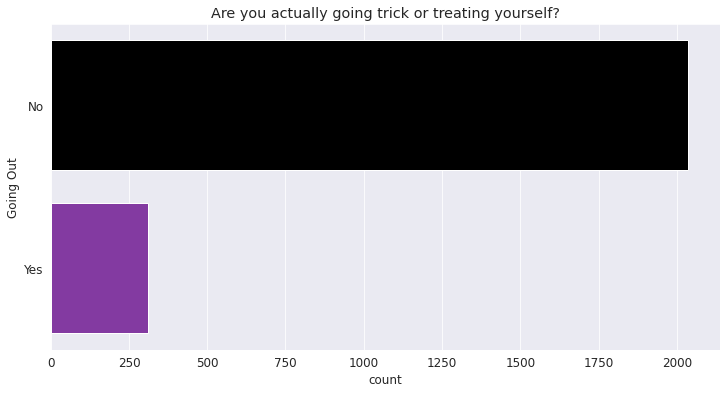

In [42]:
#Visualize in a bar chart
plt.figure(figsize=(12,6))
plt.xticks(rotation=0)
plt.title('Are you actually going trick or treating yourself?')
sns.countplot(y = 'Going Out', data = candy_survey_df);

The overwhelming majority of respondents said that they would not be going out trick or treating.

### Gender

The gender question allowed for four answers: Male, Female, I'd Rather Not Say, and Other.

In [43]:
candy_survey_df.Gender.value_counts() #View results of values

Male                  1467
Female                 839
I'd rather not say      82
Other                   29
Name: Gender, dtype: int64

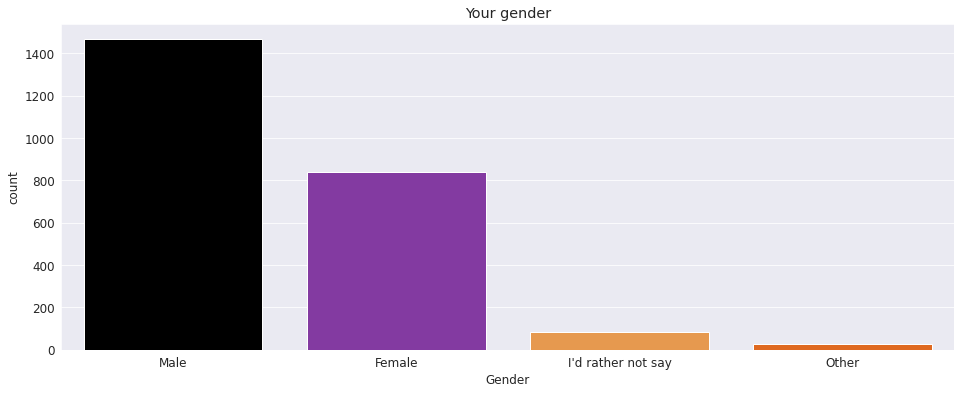

In [44]:
#Visualize in a bar chart
plt.figure(figsize=(16,6))
plt.xticks(rotation=0)
plt.title('Your gender')
sns.countplot(x = 'Gender', data = candy_survey_df);

I was surprised that the majority of respondents chose "Male" as their gender.

### Age
Let's take a look at the ages reported by respondents.

In [45]:
candy_survey_df.Age.value_counts() # View counts of Ages of respondents

40.0     92
34.0     90
37.0     89
43.0     86
36.0     79
         ..
4.0       1
39.4      1
74.0      1
102.0     1
99.0      1
Name: Age, Length: 80, dtype: int64

In [46]:
#Import NumPy
import numpy as np

(array([  2.,  10.,  27.,  30.,  62., 151., 340., 391., 407., 326., 255.,
        161., 108.,  41.,  25.,   6.,   0.,   1.,   2.,   3.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100]),
 <a list of 20 Patch objects>)

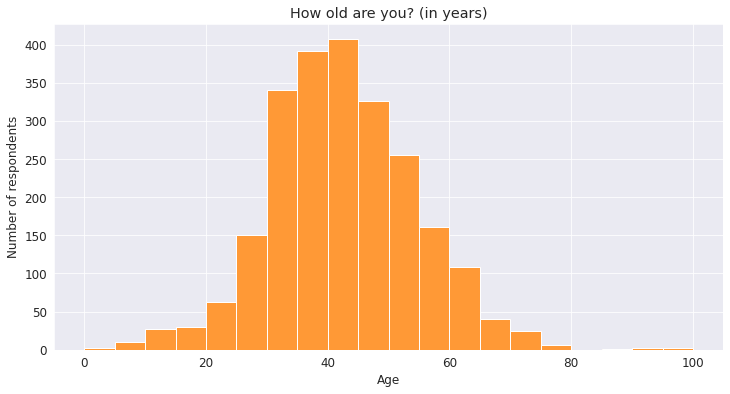

In [47]:
#Display age range in a histogram
plt.figure(figsize=(12,6))
plt.xticks(rotation=0)
plt.title('How old are you? (in years)')
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(candy_survey_df.Age, bins=np.arange(0,105,5), color='#ff9936')

The answers to the Age survey question were interesting because the data included ages that were too young to fill out the survey themselves. It led me to believe that an older parent/guardian answered in a younger person's place.

### Country
What country do you live in?

With the knowledge that the respondents' countries weighed heavily amongst the two countries, I decided to narrow my analysis to only the top 10 countries.

In [48]:
#Creating a series of only the countries in the top 10 of responses
top_countries = candy_survey_df.Country.value_counts().head(10)

top_countries

United States     2037
Canada             225
United Kingdom      35
Germany             10
Australia            7
Netherlands          6
Scotland             5
Japan                5
Ireland              4
Mexico               4
Name: Country, dtype: int64

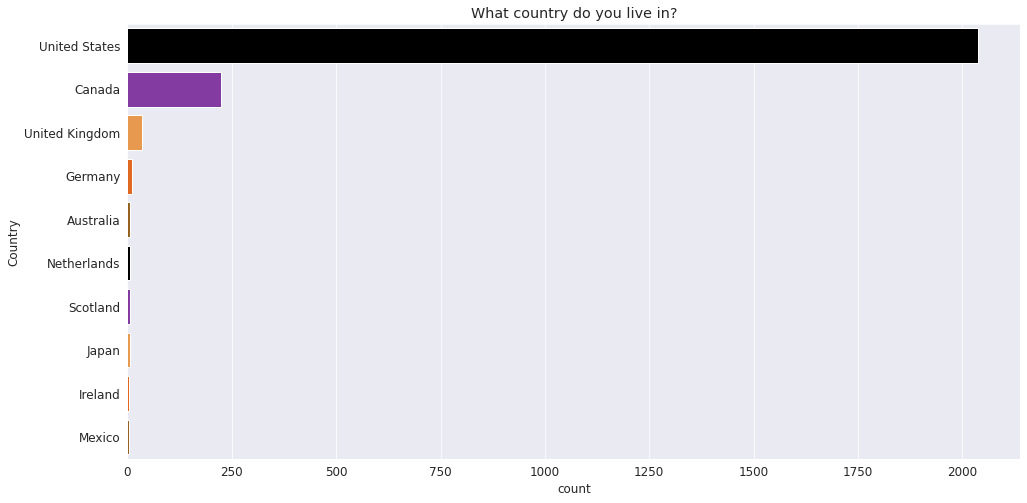

In [49]:
#Visualize the top 10 countries of responses in a bar chart
plt.figure(figsize=(16, 8))
plt.xticks(rotation=0)
plt.title('What country do you live in?')
sns.countplot(y = 'Country', data = candy_survey_df, order=candy_survey_df.Country.value_counts().iloc[0:10].index);

Respondents were primarily located in the United States which I found interesting since the UBC is a Canadian institution.

### Candy Ratings: Joy or Despair?
The primary focus of the survey was to collect data on whether people liked, disliked, or had no strong opinion on candies. The ratings were: Joy, Despair, and Meh. 

I started by creating a subset of the dataframe that only included candy ratings.

In [50]:
candy_df = candy_survey_df.iloc[0: , 5:]

candy_df

,100 Grand Bar,Mary Janes,Any Full-Sized Candy Bar,Black Jacks,Bonkers (The Candy),Bonkers (The Board Game),Bottle Caps,Box'O'Raisins,Broken Glow Stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy That Is Clearly Just The Stuff Given Out For Free At Restaurants,Caramellos,"Cash, Or Other Forms Of Legal Tender",Chardonnay,Chick-O-Sticks (We Don't Know What That Is),Chiclets,Coffee Crisp,Creepy Religious Comics/Chick Tracts,Dental Paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow Sticks,Goo Goo Clusters,Good N' Plenty,Gum From Baseball Cards,Gummy Bears Straight Up,Hard Candy,Healthy Fruit,Heath Bar,Hershey'S Dark Chocolate,Hershey's Milk Chocolate,Hershey'S Kisses,Hugs (Actual Physical Hugs),Jolly Rancher (Bad Flavor),Jolly Ranchers (Good Flavor),Joyjoy (Mit Iodine!),...,Minibags Of Chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'N'Laters,Peeps,Pencils,Pixy Stix,Real Housewives Of Orange County Season 9 Blue-Ray,Reese's Peanut Butter Cups,Reese'S Pieces,Reggie Jackson Bar,Rolos,Sandwich-Sized Bags Filled With Booberry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids,Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (A Friend To Diabetes),Take 5,Tic Tacs,Those Odd Marshmallow Circus Peanut Things,Three Musketeers,Tolberone,Trail Mix,Twix,High Fructose Corn Syrup,Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat Anything,York Peppermint Patties
1,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,...,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,...,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR
4,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,JOY,MEH,...,DESPAIR,JOY,JOY,MEH,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,JOY,DESPAIR,JOY,JOY,MEH,JOY,NaN,JOY,JOY,DESPAIR,NaN,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY
5,JOY,DESPAIR,JOY,NaN,NaN,NaN,MEH,MEH,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,JOY,JOY,MEH,MEH,JOY,DESPAIR,MEH,MEH,JOY,NaN,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,MEH,JOY,JOY,MEH,MEH,MEH,MEH,MEH,NaN,...,JOY,JOY,JOY,JOY,MEH,JOY,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,MEH,MEH,NaN,NaN,MEH,DESPAIR,JOY,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,

Then to get an idea of what data could look like, I created a subset of a single candy's ratings for visualization: the 100 Grand Bar.

In [51]:
#Create a subset of 100 Grand Bar data
grand_df = candy_survey_df.iloc[0: , 5:6]

grand_df

,100 Grand Bar
1,MEH
2,NaN
3,MEH
4,JOY
5,JOY
...,...
2455,JOY
2456,MEH
2457,MEH
2458,NaN


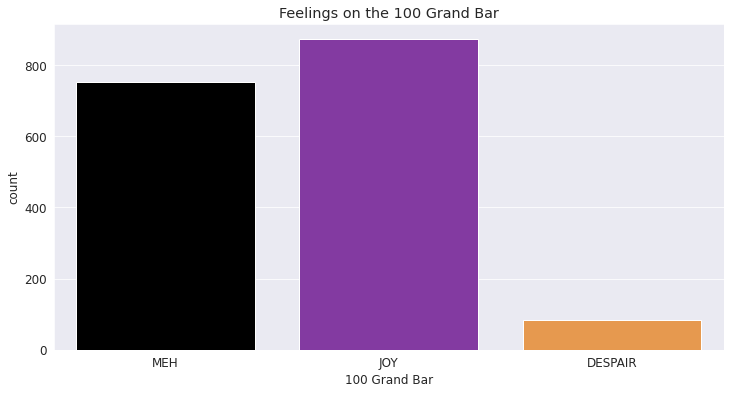

In [52]:
#Visualize the candy ratings

plt.figure(figsize=(12,6))
plt.xticks(rotation=0)
plt.title('Feelings on the 100 Grand Bar')
sns.countplot(x = '100 Grand Bar', data = candy_survey_df);

There were very few people who hated it and surprisingly people either loved it or had no strong opinion.

Since there are over 100 candies in the survey, I created a subset of 8 candies to explore. ("Generic Brand Acetaminophen", This survey had some really weird questions.)

In [53]:
#Created a data range of 8 candies 
candy_sample_df = candy_survey_df.iloc[0: , 26:34]

candy_sample_df

,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow Sticks,Goo Goo Clusters,Good N' Plenty,Gum From Baseball Cards
1,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR
4,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR
5,MEH,JOY,NaN,DESPAIR,MEH,JOY,MEH,DESPAIR
...,...,...,...,...,...,...,...,...
2455,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,JOY
2456,DESPAIR,MEH,NaN,MEH,DESPAIR,NaN,DESPAIR,DESPAIR
2457,MEH,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,DESPAIR
2458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


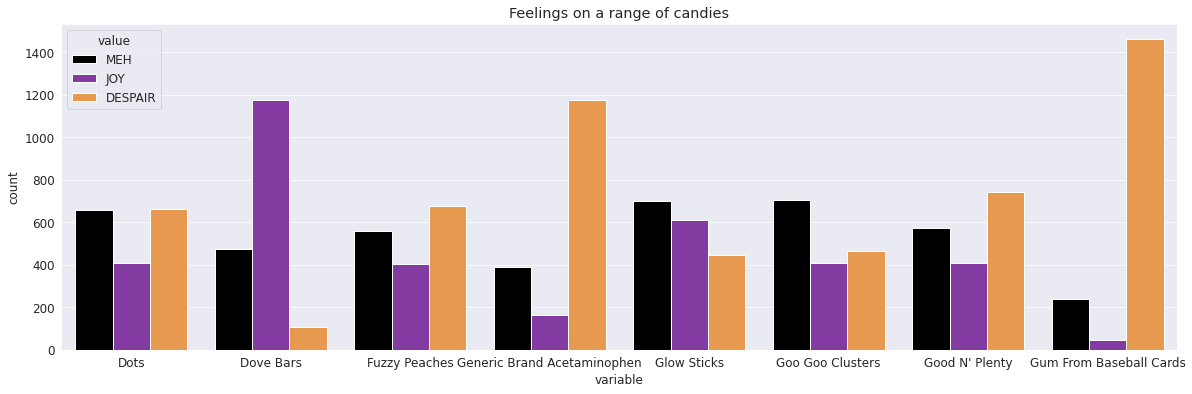

In [54]:
#Visualize ratings
candy_ratings_df = pd.melt(candy_sample_df) # .melt() function rotates data like a pivot table
plt.figure(figsize=(20,6))
plt.xticks(rotation=0)
plt.title('Feelings on a range of candies')
sns.countplot(x = 'variable', hue='value', data = candy_ratings_df);

Of this range, Dove Bars were an overwhelming favorite and I would have to agree.

In [55]:
import jovian

In [56]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/rdhm113/course-project-halloween-candy


'https://jovian.ml/rdhm113/course-project-halloween-candy'

## Asking and Answering Questions

After visualizing some of the data I had a few questions to delve into further.

**Q: How many adults (respondants 18 and over) answered the survey?**

I created a new series of the cleaned data that contained only rows where Age was 18 and older, dropped rows with null values, and converted the float numerical value to integer.

In [57]:
adults_df = candy_survey_df.copy()
adults_df.drop(adults_df[adults_df.Age < 18].index, inplace = True) #drop rows for ages younger than 18
adults_df.dropna(subset = ['Age'], inplace=True) #drop rows where Age column has a NaN value
adults_df.Age = adults_df.Age.astype(int) #convert Age values from float to integer
adults_df['Age']

1       44
2       49
3       40
4       23
6       53
        ..
2455    24
2456    33
2457    26
2458    58
2459    66
Name: Age, Length: 2293, dtype: int64

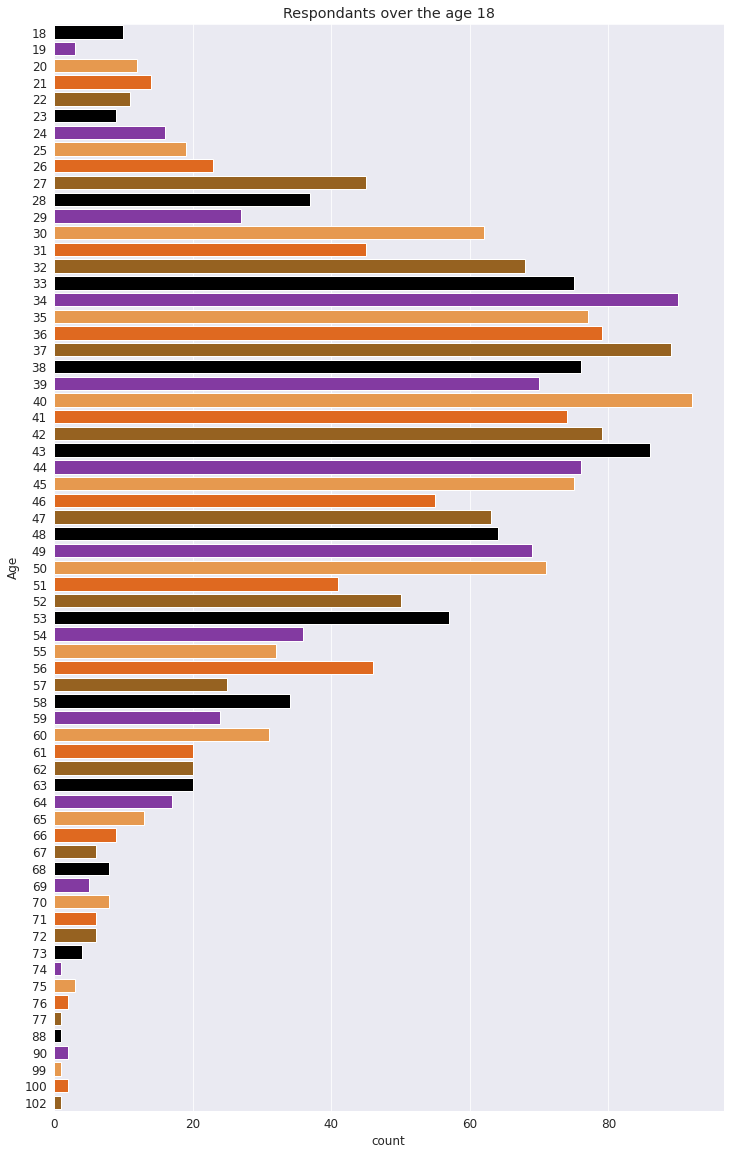

In [58]:
plt.figure(figsize=(12,20))
plt.xticks(rotation=0)
plt.title('Respondants over the age 18')
sns.countplot(y = 'Age', data = adults_df);

We see from the data that of the 2,293 adult respondants most are in the mid-30s to mid-40s range.

**Q: Who is going out versus staying in in the top 10 countries?**

I created a dataframe of only the "Going Out" and "Country" columns for comparison.

In [59]:
#Reviewing the top 10 countries
top_countries

United States     2037
Canada             225
United Kingdom      35
Germany             10
Australia            7
Netherlands          6
Scotland             5
Japan                5
Ireland              4
Mexico               4
Name: Country, dtype: int64

In [60]:
top_countries_list = ['United States','Canada','United Kingdom','Germany','Australia', 'Netherlands','Scotland', 'Japan', 'Mexico' , 'Ireland']

top_countries_list

['United States',
 'Canada',
 'United Kingdom',
 'Germany',
 'Australia',
 'Netherlands',
 'Scotland',
 'Japan',
 'Mexico',
 'Ireland']

In [61]:
#Reviewing the column names

candy_survey_df.columns

Index(['Going Out', 'Gender', 'Age', 'Country', 'State, Province, County, Etc',
       '100 Grand Bar', 'Mary Janes', 'Any Full-Sized Candy Bar',
       'Black Jacks', 'Bonkers (The Candy)',
       ...
       'Three Musketeers', 'Tolberone', 'Trail Mix', 'Twix',
       'High Fructose Corn Syrup', 'Vicodin', 'Whatchamacallit Bars',
       'White Bread', 'Whole Wheat Anything', 'York Peppermint Patties'],
      dtype='object', length=108)

In [62]:
#Creating data frame of only Going Out and Country data
going_out_df = candy_survey_df[['Going Out', 'Country']].copy()
#Filtering data for only the top 10 countries in Country column
going_out_df = going_out_df.loc[(going_out_df['Country'].isin(top_countries_list))]
going_out_df

,Going Out,Country
1,No,United States
2,NaN,United States
3,No,United States
4,No,United States
6,No,United States
...,...,...
2455,No,United States
2456,No,United States
2457,No,United States
2458,No,United States


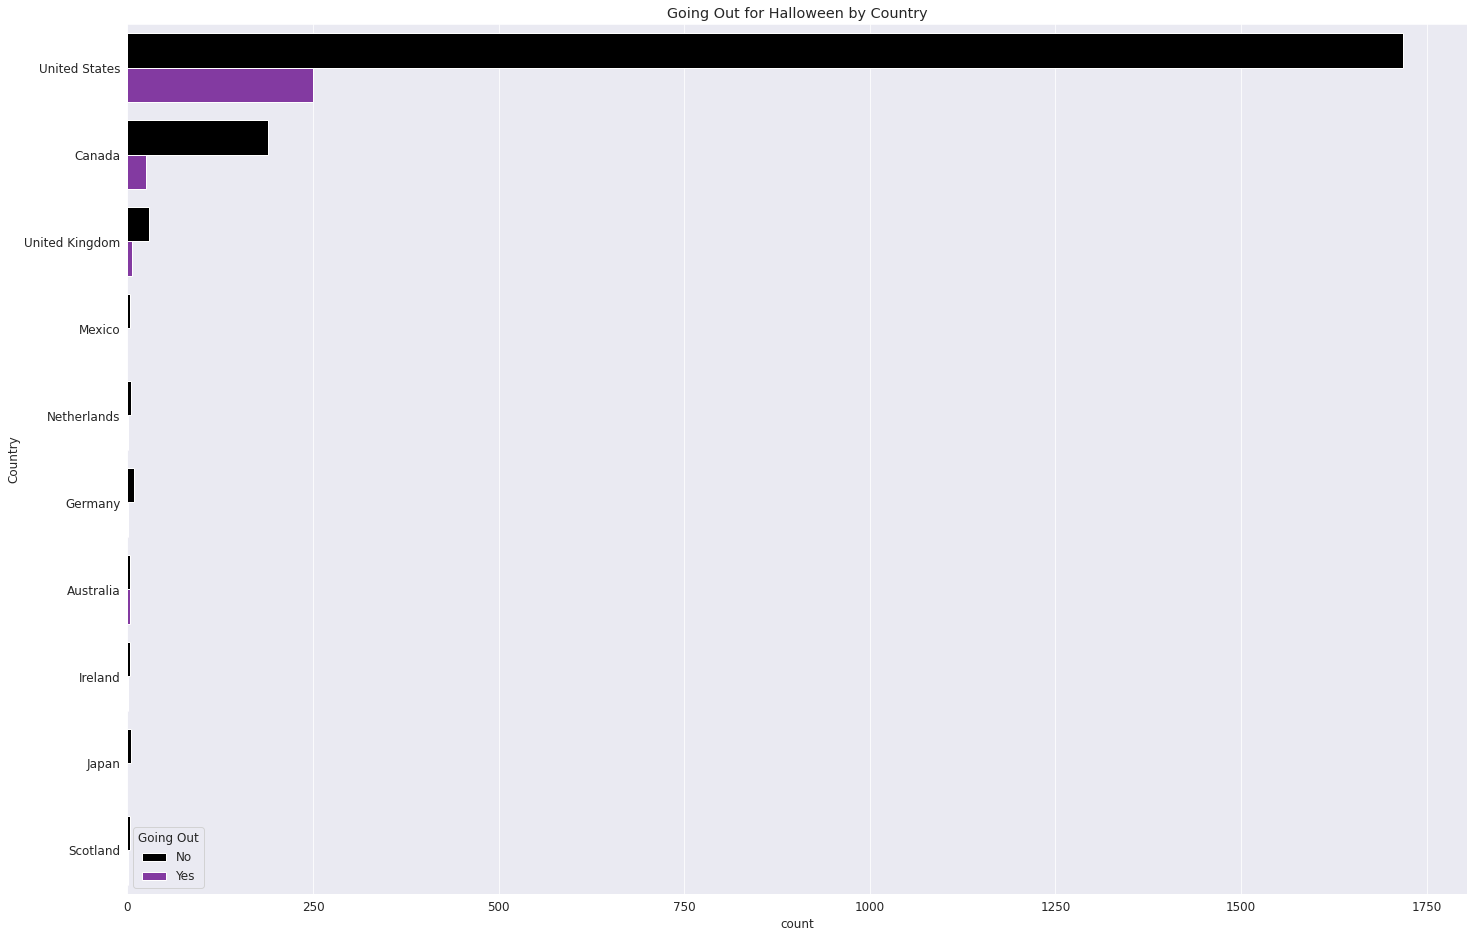

In [63]:
plt.figure(figsize=(24,16))
plt.xticks(rotation = 0)
plt.title('Going Out for Halloween by Country')
sns.countplot( y = 'Country', hue = 'Going Out' , data = going_out_df);

Of the 2,338 respondents, an overwhelming number were staying indoors for Halloween.

**Q: What are the demographics (Gender and Age) per top 10 country?**

I created a dataframe subset with only Gender, Age, and Country columns and then used the average age as a comparison.

In [64]:
candy_survey_demo = candy_survey_df.iloc[0:,1:4] #copy of survey dataset with only age, gender and country,
candy_survey_demo = candy_survey_demo.loc[(candy_survey_demo['Country'].isin(top_countries_list))] #subset data to only include top 10 countries 

candy_survey_demo

,Gender,Age,Country
1,Male,44.0,United States
2,Male,49.0,United States
3,Male,40.0,United States
4,Male,23.0,United States
6,Male,53.0,United States
...,...,...,...
2455,Male,24.0,United States
2456,Female,33.0,United States
2457,Female,26.0,United States
2458,Male,58.0,United States


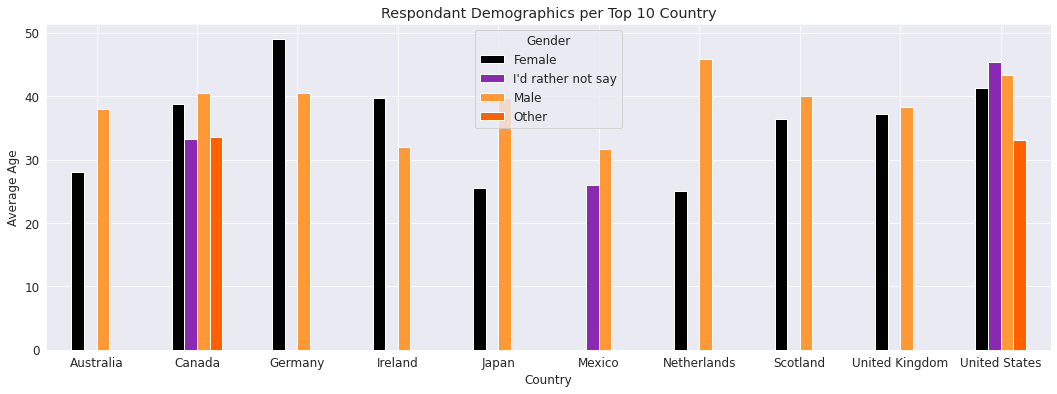

In [65]:
#average the age column per country and gender and then plot
candy_survey_demo.groupby(['Country','Gender'])['Age'].mean().unstack().plot.bar(figsize=(18,6), rot=0, title='Respondant Demographics per Top 10 Country', ylabel="Average Age");



I found it interesting that in the United States the respondents with the oldest average age chose to not respond with their gender and the respondents with the oldest average age in Germany were female.

**Q: What are the top 10 candies that bring joy?**



Now for the good stuff, unlike the subset of candy rating data that I used during analysis, I manipulated a dataframe subset of **all** of the candy ratings, and then pulled out the top 10 rated highest for "JOY."

In [66]:
#Recall data subset of just candy columns, create a copy using .melt() function to pivot data
candy_ratings_df = candy_df.melt(var_name='columns', value_name='index')
# use .crosstab() function to count total DESPAIR, JOY, and MEH values
candy_ratings_df = pd.crosstab(index = candy_ratings_df['index'], columns = candy_ratings_df['columns'])

candy_ratings_df

columns,100 Grand Bar,Abstained From M&M'Ing.,Any Full-Sized Candy Bar,Black Jacks,Blue M&M'S,Bonkers (The Board Game),Bonkers (The Candy),Bottle Caps,Box'O'Raisins,Broken Glow Stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy That Is Clearly Just The Stuff Given Out For Free At Restaurants,Caramellos,"Cash, Or Other Forms Of Legal Tender",Chardonnay,Chick-O-Sticks (We Don't Know What That Is),Chiclets,Coffee Crisp,Creepy Religious Comics/Chick Tracts,Dental Paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow Sticks,Goo Goo Clusters,Good N' Plenty,Green Party M&M'S,Gum From Baseball Cards,Gummy Bears Straight Up,Hard Candy,Healthy Fruit,Heath Bar,Hershey'S Dark Chocolate,Hershey'S Kisses,Hershey's Milk Chocolate,High Fructose Corn Syrup,Hugs (Actual Physical Hugs),...,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'N'Laters,Peanut M&M's,Peeps,Pencils,Pixy Stix,Real Housewives Of Orange County Season 9 Blue-Ray,Red M&M'S,Reese'S Pieces,Reese's Peanut Butter Cups,Reggie Jackson Bar,Regular M&Ms,Rolos,Sandwich-Sized Bags Filled With Booberry Crunch,Senior Mints,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids,Spotted Dick,Starburst,Swedish Fish,Sweet Tarts,Sweetums (A Friend To Diabetes),Take 5,Those Odd Marshmallow Circus Peanut Things,Three Musketeers,Tic Tacs,Tolberone,Trail Mix,Twix,Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat Anything,York Peppermint Patties
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DESPAIR,85,691,17,792,119,546,495,560,1178,1624,141,395,743,1324,163,65,317,644,761,541,1405,1432,664,107,676,1175,448,464,742,136,1461,431,586,854,213,175,222,225,1146,889,...,220,803,358,102,556,121,1084,1075,546,1479,123,168,95,486,75,140,1150,895,321,425,415,79,511,1139,299,448,359,763,353,1250,175,753,84,835,71,723,288,1455,1289,232
JOY,873,218,1557,92,1017,193,116,465,117,24,1175,819,478,39,952,1439,1039,299,243,472,246,90,409,1176,402,162,611,409,407,971,44,747,271,228,1068,1104,833,895,232,431,...,856,353,769,1187,360,1289,239,181,541,91,1000,1134,1496,254,1120,1150,211,150,828,728,539,1397,769,128,851,753,781,151,576,189,1057,264,1319,228,1412,706,839,44,117,1104
MEH,753,607,212,616,595,713,855,668,475,104,460,561,559,404,591,274,359,569,743,592,103,244,656,473,557,390,702,706,575,587,237,583,906,682,465,506,725,666,288,425,...,642,558,608,471,725,377,425,493,649,135,606,465,188,704,588,454,321,471,603,580,603,292,440,309,615,542,610,542,612,283,518,727,349,687,285,240,508,202,305,417


In [67]:
# use .iloc method to call only the "JOY" row, sort values in descending order, and take top 10 values
candy_joy_df = candy_ratings_df.iloc[1].sort_values(ascending=False).head(10)

candy_joy_df

columns
Any Full-Sized Candy Bar                1557
Reese's Peanut Butter Cups              1496
Kit Kat                                 1445
Cash, Or Other Forms Of Legal Tender    1439
Twix                                    1412
Snickers                                1397
Tolberone                               1319
Peanut M&M's                            1289
Lindt Truffle                           1275
Nestle Crunch                           1187
Name: JOY, dtype: int64

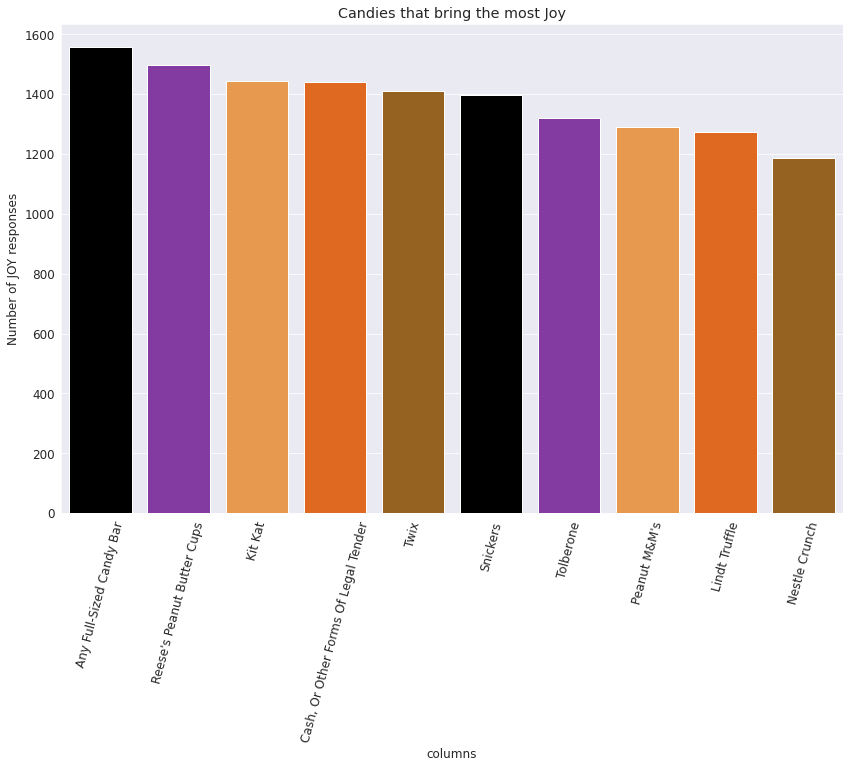

In [68]:
#visualize data
plt.figure(figsize=(14,9))
plt.xticks(rotation=75)
plt.xlabel('Candy')
plt.ylabel('Number of JOY responses')
plt.title('Candies that bring the most Joy')
sns.barplot( x=candy_joy_df.index, y=candy_joy_df.values);

Not very surprising that full-sized candy bars were the absolute favorite.


**Q: What are the top 10 worst candies that bring despair?**

As in the above question, I manipulated a dataframe subset of **all** of the candy ratings, and then pulled out the top 10 rated highest for "DESPAIR." Otherwise known as the 10 least liked candies.

In [69]:
# use .iloc method to call only the "DESPAIR" row, sort values in descending order, and take top 10 (or 10 worst) values
candy_despair_df = candy_ratings_df.iloc[0].sort_values(ascending=False).head(10)

candy_despair_df

columns
Broken Glow Stick                                                         1624
Real Housewives Of Orange County Season 9 Blue-Ray                        1479
Gum From Baseball Cards                                                   1461
White Bread                                                               1455
Kale Smoothie                                                             1434
Dental Paraphenalia                                                       1432
Creepy Religious Comics/Chick Tracts                                      1405
Candy That Is Clearly Just The Stuff Given Out For Free At Restaurants    1324
Whole Wheat Anything                                                      1289
Those Odd Marshmallow Circus Peanut Things                                1250
Name: DESPAIR, dtype: int64

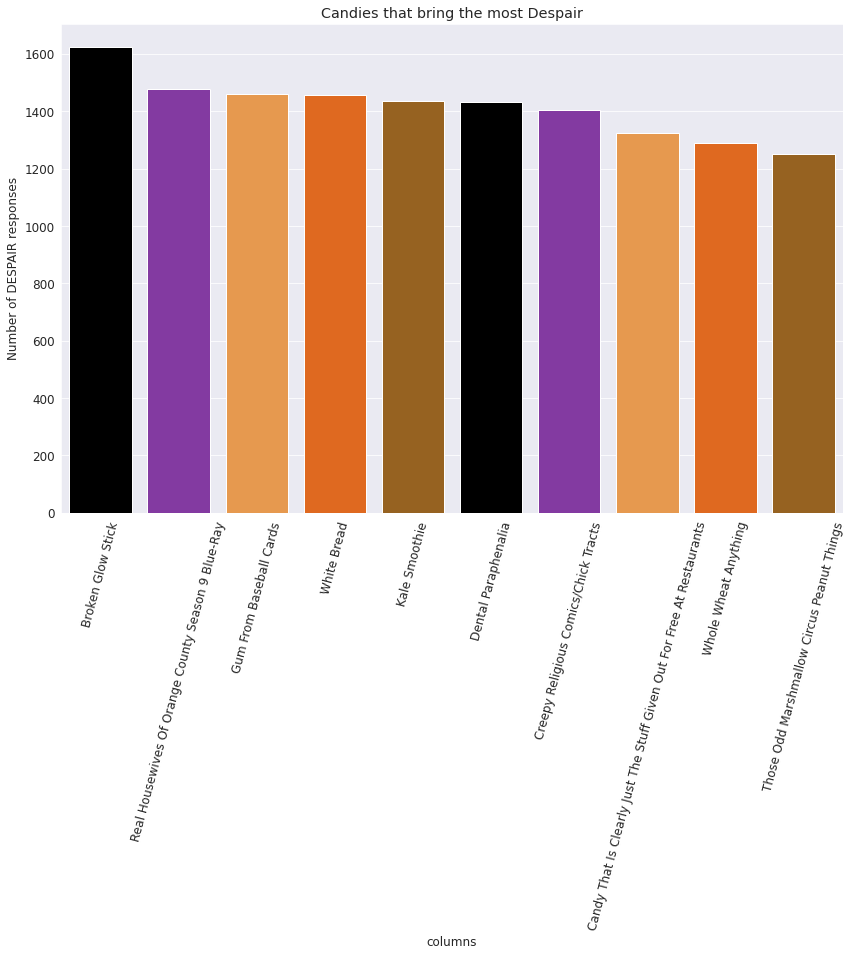

In [70]:
plt.figure(figsize=(14,9))
plt.xticks(rotation=75)
plt.xlabel('Candy')
plt.ylabel('Number of DESPAIR responses')
plt.title('Candies that bring the most Despair')
sns.barplot( x=candy_despair_df.index, y=candy_despair_df.values);

The data retrieved with this question highlighted the odd questions included in the survey. Because of this, there wasn't a lot of meaningful data pulled.

In [71]:
import jovian

In [72]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/rdhm113/course-project-halloween-candy


'https://jovian.ml/rdhm113/course-project-halloween-candy'

## Inferences and Conclusion

* This was a challenging dataset to analyze. It tested my patience when it came 
to cleaning up the countries and caused me to stretch when I knew about manipulating the math. 

* The overwhelming majority of respondents said that they would not go out trick or treating. I wonder how the answers would have changed if instead, the question asked if the respondents were going out to Halloween parties.
The demographics of survey respondents generally leaned male and were in the age range of the mid-30s to mid-40s.

* Full-size candy bars were a favorite for Halloween candy. I think that option was misleading because it wasn't a type of candy. Without that option, Reese's Peanut Butter Cups would be the true winner.

* There is bias in the survey data that since it's from a Canadian institute, the data is highly westernized and English-speaking focused. Even though there were responses from countries other than Canada and the US, there wasn't enough data for true learnings.

* I would suggest that the surveyors used a standardized set of location information (countries, provinces, states, counties, etc.) to eliminate the free for all with a text-field. For that reason, I didn't analyze the "State, Province, County" data column.

* There's an [interesting infographic from Boing Boing](https://www.scq.ubc.ca/wp-content/uploads/2017/10/candyhierarchy2017.pdf) of all of the day ratings sorted into additional categories.




In [73]:
import jovian

In [74]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/rdhm113/course-project-halloween-candy


'https://jovian.ml/rdhm113/course-project-halloween-candy'

## References and Future Work

If I were to continue analyzing this dataset, I would look into these ideas:
* Clean up the data some more to dig into the different states and provinces.
* Analyze candy ratings across ages per country. 
* Remove candy rating columns that weren't actual candy.
* Analyze ages per country.

References:
* University of British Columbia Candy Hierarchy Survey: https://www.scq.ubc.ca/so-much-candy-data-seriously/
* Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
* Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
* Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
* GeekforGeeks: https://www.geeksforgeeks.org

My Jupyter notebook and the CSV file I used are saved to my GitHub for viewing.

In [75]:
import jovian

In [ ]:
jovian.commit(project=project_name)